# Customer Churn Prediction Model

## About Dataset
## Description:
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.

## Features:
`RowNumber`: The sequential number assigned to each row in the dataset.

`CustomerId`: A unique identifier for each customer.

`Surname`: The surname of the customer.

`CreditScore`: The credit score of the customer.

`Geography`: The geographical location of the customer (e.g., country or region).

`Gender`: The gender of the customer.

`Age`: The age of the customer.

`Tenure`: The number of years the customer has been with the bank.

`Balance`: The account balance of the customer.

`NumOfProducts`: The number of bank products the customer has.

`HasCrCard`: Indicates whether the customer has a credit card (binary: yes/no).

`IsActiveMember`: Indicates whether the customer is an active member (binary: yes/no).

`EstimatedSalary`: The estimated salary of the customer.

`Exited`: Indicates whether the customer has exited the bank (binary: yes/no).

## Usage:
This dataset can be used for exploratory data analysis to understand the factors influencing customer churn in banks.
It can also be used to build machine learning models for predicting customer churn based on the given features.

## License:
This dataset is made available under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.

# Data Preparation

In [4]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [5]:
#load the dataset
df = pd.read_csv('ChurnDataset.csv')

#first few rows display
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### since we don't have null values proceed on describe the dataset and drop columns that irrelevant.
#### in this model creation: `RowNumber` , `CustomerNo` and `Surname` is not relevant in the prediction

In [13]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

#### we transform the categorical variables: `Geography`, `Gender` into numerical format using one-hot encoding or label encoding.

In [16]:
#one-hot encoding for Geography
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

#label encoding for Gender
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # Female=0, Male=1


#### we scale numerical features: `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary` to ensure they are on the same scale.

In [19]:
scaler = StandardScaler()
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Checking the model

In [22]:
print(df.dtypes)

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
dtype: object


In [24]:
#checking the scaled feature, Inspect the numerical features to confirm they are scaled. 
#StandardScaler typically transforms the data to have a mean of 0 and a standard deviation of 1.

print(df[numerical_features].mean())  # Should be close to 0
print(df[numerical_features].std())   # Should be close to 1

CreditScore       -4.824585e-16
Age                2.318146e-16
Tenure            -1.078249e-16
Balance           -6.252776e-17
NumOfProducts      1.634248e-17
EstimatedSalary   -2.877698e-17
dtype: float64
CreditScore        1.00005
Age                1.00005
Tenure             1.00005
Balance            1.00005
NumOfProducts      1.00005
EstimatedSalary    1.00005
dtype: float64


In [28]:
#Verify the Range of Encoded Categorical Features
#Check the encoded categorical variables: Gender, Geography to ensure they are in the correct range or format.

# Unique values for Gender
print("Gender unique values:", df["Gender"].unique())

# One-hot encoded columns for Geography
print("Geography columns:", [col for col in df.columns if "Geography" in col])

Gender unique values: [0 1]
Geography columns: ['Geography_Germany', 'Geography_Spain']


In [30]:
print(df.head())
print(df.describe())

   CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221       0  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036       0  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794       0  0.293517  1.032908  1.333053       2.527057   
3     0.501521       0  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884       0  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0          1               1         0.021886       1              False   
1          0               1         0.216534       0              False   
2          1               0         0.240687       1              False   
3          0               0        -0.108918       0              False   
4          1               1        -0.365276       0              False   

   Geography_Spain  
0            False  
1             True  
2            False  
3            False  
4          

In [32]:
#verify Feature Variance
#check if any features have near-zero variance - which may not be informative for the model
from sklearn.feature_selection import VarianceThreshold

#variance threshold to identify low-variance features
selector = VarianceThreshold(threshold=0.01)  # 1% threshold
selector.fit(df)
low_variance_features = [col for col, var in zip(df.columns, selector.variances_) if var < 0.01]
print("Low variance features:", low_variance_features)


Low variance features: []


# Correlation of each features

In [35]:
correlation_matrix = df.corr()
print(correlation_matrix["Exited"].sort_values(ascending=False))

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


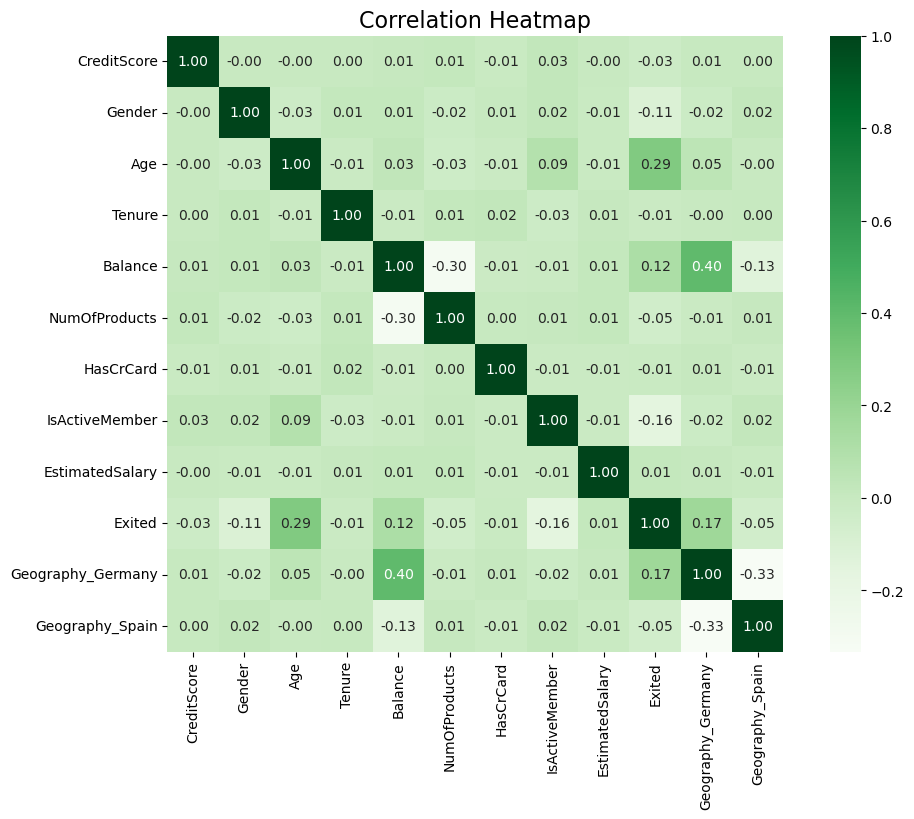

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Greens", cbar=True, square=True)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()

# Training the Model

In [41]:
#split the dataset first

# Separate features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test size = 20% of dataset


In [43]:
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (8000, 11)
Test set shape: (2000, 11)


In [45]:
#import the libraries needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#Initialize and train the Random Forest model using the training dataset.

#initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

#train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
#Use the trained model to predict on the test dataset.

y_pred = rf_model.predict(X_test)

# Evaluation of the Model

In [51]:
#we evaluate the performance of the model using metrics like accuracy, confusion matrix, and classification report.

#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.87
Confusion Matrix:
[[1548   59]
 [ 207  186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [53]:
#we will optimize the Model Using Hyperparameter Tuning
#we use  the RandomizedSearchCV for hyperparameter optimization

#define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

#perform randomized Search
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                               n_iter=50, scoring='accuracy', 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

#fit the randomized search to the data
rf_random.fit(X_train, y_train)

#indicate the best parameters
print("Best Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}


In [54]:
#next we evaluate the Optimized Model by training a new Random Forest model using the best parameters 
#from RandomizedSearchCV and evaluate its performance.

#train the optimized model
best_rf_model = rf_random.best_estimator_
best_rf_model.fit(X_train, y_train)

#this will make predictions with the optimized model
y_pred_optimized = best_rf_model.predict(X_test)

#we evaluate performance
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized:.2f}")

#show confusion matrix and classification report
print("Optimized Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Optimized Accuracy: 0.86
Optimized Confusion Matrix:
[[1546   61]
 [ 212  181]]
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



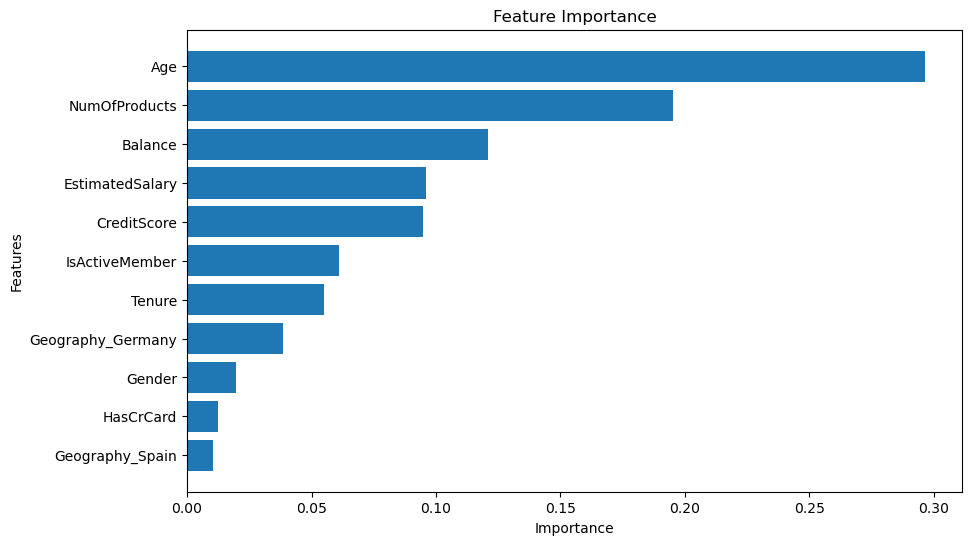

In [55]:
#we look into the feature Importance, this defines which features contribute the most to the model's predictions.

importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


# Saving the model


In [67]:
import joblib

# Save the model
#joblib.dump(best_rf_model, "ChurnPredictionModel.pkl")

# To load the model in the future
# loaded_model = joblib.load("random_forest_model.pkl")


In [69]:
# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

# Trying the model

Predicts whether a customer is likely to churn or not based on input data.

    `Parameters` :
        input_data (dict): A dictionary containing the input features for the customer.
        model (sklearn model): The trained Random Forest model.
        scaler (StandardScaler): The fitted scaler for preprocessing numerical features.
        encoder (LabelEncoder): The fitted encoder for preprocessing the gender feature.

    `Returns` :
        str: "Likely to Churn" or "Unlikely to Churn"

In [61]:
def predict_churn(input_data, model, scaler, encoder):

    # Define the feature order
    feature_order = ["CreditScore", "Geography", "Gender", "Age", "Tenure", 
                     "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", 
                     "EstimatedSalary"]
    
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Preprocess categorical features
    input_df["Gender"] = encoder.transform(input_df["Gender"])  # Encode Gender
    input_df = pd.get_dummies(input_df, columns=["Geography"], drop_first=True)  # One-hot encode Geography
    
    # Ensure the one-hot encoded columns match the training data
    for col in [col for col in model.feature_names_in_ if col.startswith("Geography")]:
        if col not in input_df.columns:
            input_df[col] = 0  # Add missing Geography columns with default value 0
    
    # Scale numerical features
    numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
    input_df[numerical_features] = scaler.transform(input_df[numerical_features])
    
    # Make a prediction
    prediction = model.predict(input_df[model.feature_names_in_])
    
    # Interpret the result
    return "Likely to Churn" if prediction[0] == 1 else "Unlikely to Churn"


In [63]:
# Example customer data
input_data = {
    "CreditScore": 600,
    "Geography": "France",  # Must match the training data categories
    "Gender": "Male",       # Must match the LabelEncoder values
    "Age": 40,
    "Tenure": 5,
    "Balance": 50000,
    "NumOfProducts": 2,
    "HasCrCard": 1,         # 1 for Yes, 0 for No
    "IsActiveMember": 1,    # 1 for Yes, 0 for No
    "EstimatedSalary": 75000
}

# Predict churn
result = predict_churn(input_data, best_rf_model, scaler, label_encoder)
print("Prediction:", result)


Prediction: Unlikely to Churn
